<a href="https://colab.research.google.com/github/aliabdari/compressed-QA/blob/main/QA_compressed_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow import keras

In [130]:
import numpy as np
x_temp = np.load('/content/drive/MyDrive/information_live/x_vgg16.npy',allow_pickle= True)

In [131]:
x_temp.shape[0]

160

In [132]:
x_temp2 = np.empty(150,dtype=object)

In [133]:
idx = 0
for i in range(x_temp.shape[0]):
  if i % 16 == 0:
    continue
  x_temp2[idx] = x_temp[i]
  idx+=1

In [134]:
x_temp2.shape

(150,)

## Load DOM

In [135]:
y_temp = np.loadtxt('/content/drive/MyDrive/live_dataset_Reconstructed_Residuals/live_video_quality_data.txt')

In [136]:
y_temp.shape

(150, 2)

In [137]:
y = y_temp[:,0]

In [138]:
y = np.asarray(y).astype('float32')

## POT

In [139]:
np.mean(x_temp2[10], axis=1).shape

(4096,)

In [140]:
x = np.empty((150,4096),dtype=object)
for i in range(x_temp2.shape[0]):
  x[i,:] = np.mean(x_temp2[i], axis=1)
  pass

In [141]:
x.shape

(150, 4096)

In [142]:
x = np.asarray(x).astype('float32')

# Data preparation

In [143]:
x_test = x[0:30,:].copy()
y_test = y[0:30].copy()

In [144]:
x_test.shape

(30, 4096)

In [145]:
x_train = x[30:,:].copy()
y_train = y[30:].copy()

In [146]:
x_train.shape

(120, 4096)

In [147]:
def do_shuffle(X,Y,number_of_data):
  shuffle_index = np.arange(number_of_data)
  np.random.shuffle(shuffle_index)
  return X[shuffle_index],Y[shuffle_index]

In [148]:
x_train,y_train = do_shuffle(x_train,y_train,120)

In [149]:
x_train.dtype

dtype('float32')

## Model

In [150]:
model = Sequential()
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.35))
model.add(Dense(32, activation="linear"))
model.add(Dropout(0.25))
model.add(Dense(16,activation="linear"))
model.add(Dense(2, activation="linear"))

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_squared_error", optimizer=opt)
# train the model
history = model.fit(x=x_train, y=y_train, 
	validation_data=(x_test, y_test),
	epochs=25, 
	batch_size=32)

Epoch 1/25
4/4 [==============================] - 1s 49ms/step - loss: 1173.0513 - val_loss: 439.4739
Epoch 2/25
4/4 [==============================] - 0s 11ms/step - loss: 784.0677 - val_loss: 147.8406
Epoch 3/25
4/4 [==============================] - 0s 11ms/step - loss: 459.2206 - val_loss: 505.2856
Epoch 4/25
4/4 [==============================] - 0s 10ms/step - loss: 501.7033 - val_loss: 347.5153
Epoch 5/25
4/4 [==============================] - 0s 10ms/step - loss: 318.3716 - val_loss: 164.2665
Epoch 6/25
4/4 [==============================] - 0s 10ms/step - loss: 346.6248 - val_loss: 130.2267
Epoch 7/25
4/4 [==============================] - 0s 11ms/step - loss: 291.9739 - val_loss: 204.6540
Epoch 8/25
4/4 [==============================] - 0s 11ms/step - loss: 235.6009 - val_loss: 173.3610
Epoch 9/25
4/4 [==============================] - 0s 15ms/step - loss: 260.0400 - val_loss: 159.9301
Epoch 10/25
4/4 [==============================] - 0s 11ms/step - loss: 261.3516 - val_los

## Plot

In [151]:
import matplotlib.pyplot as plt

def plot_diagrams_trian_process(history):
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.legend(['loss','val_loss'])

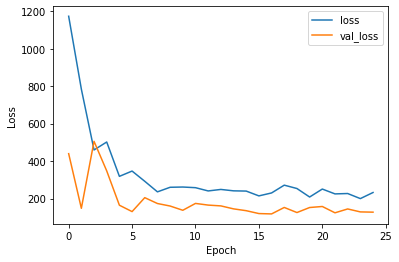

In [152]:
plot_diagrams_trian_process(history.history)